# Analyzing changes to FEAT

- Goal: analyze the affect of these changes to FEAT on its performance on benchmark problems:
        - effect of correlation deletion mutation
        - effect of post-run simplification 
        - effect of using multiple trees (increasing dimensionality) 

In [1]:
# load results, packages
import pandas as pd
import json
from glob import glob
import numpy as np
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
import pdb
#embed fonts
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import matplotlib.pyplot as plt
frames = []
stats_frames = []
print('loading results')
# rdir = ['../results_r3/', '../results_r1.2/']
# rdir = ['../results_r5/']
rdir = 'results_r15'

for f in tqdm(glob('../'+rdir + '/*/*.json')):
    try:
        with open(f,'r') as of:
            results = json.load(of)
    except Exception as e:
        print('Load fail:',f)
        print(e)
        continue
    df_stats = pd.DataFrame(results['stats'])
    df_stats['rdir'] = rdir
    df_stats['clf_name'] = results['clf_name']
    df_stats['version'] = results['version']
    df_stats['dataset'] = results['dataset']
    df_stats['random_state'] = results['random_state']
    df_stats = df_stats.rename(columns={'best_scores':'min_losses','best_score_vals':'min_losses_val'})
    stats_frames.append(df_stats)
#     stats_frames.append({k:v for k,v in results.items() if k in ['clf_name','dataset','stats','archive']})
    df = pd.DataFrame(results, columns = [k for k in results.keys() if k not in 
                             ['stats','archive','y_pred_train','y_pred_test',
                              'y_pred_proba_train','y_pred_proba_test']], index=[0])
    df['rdir'] = rdir


    frames.append(df)

df = pd.concat(frames)
df_stats = pd.concat(stats_frames)
    
datasets = list(df['dataset'].unique())
for col in ['version','clf_name','random_state','dataset']:
    print(col, '(',df[col].nunique(),')'':',df[col].unique())


/home/bill/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
  0%|          | 18/6000 [00:00<00:34, 175.37it/s]

loading results


100%|██████████| 6000/6000 [00:39<00:00, 152.78it/s]


version ( 1 ): ['0.4.post13']
clf_name ( 12 ): ['Feat_base' 'Feat_boolean' 'Feat_boolean_simplify001'
 'Feat_boolean_simplify005' 'Feat_boolean_simplify01'
 'Feat_corr_delete_mutate' 'Feat_init_l1' 'Feat_1dim' 'Feat_simplify001'
 'Feat_simplify005' 'Feat_init_l2' 'Feat_simplify01']
random_state ( 10 ): [11423 17609 19145 23963 25322 26122 27499 27653  2843 29771]
dataset ( 50 ): ['HtnHypoKdxDTrain.csv' 'backache' 'breast-cancer-wisconsin' 'chess'
 'clean1' 'clean2' 'coil2000' 'colic' 'dis' 'Hill_Valley_without_noise'
 'Hill_Valley_with_noise' 'horse-colic' 'HtndxATrain.csv'
 'HtndxBTrain.csv' 'HtndxCTrain.csv' 'HtndxDTrain.csv' 'HtndxETrain.csv'
 'HtnHeuriATrain.csv' 'HtnHeuriBTrain.csv' 'HtnHeuriCTrain.csv'
 'HtnHeuriDTrain.csv' 'HtnHeuriETrain.csv' 'HtnHypoKdxATrain.csv'
 'HtnHypoKdxBTrain.csv' 'HtnHypoKdxCTrain.csv' 'HtnHypoKdxETrain.csv'
 'HtnHypoKHeuriATrain.csv' 'HtnHypoKHeuriBTrain.csv'
 'HtnHypoKHeuriCTrain.csv' 'HtnHypoKHeuriDTrain.csv'
 'HtnHypoKHeuriETrain.csv' 'hypothyroid'

In [2]:
# df['feature_space_correlation_test'] = df['feature_space_correlation_test'].fillna(np.median)
# df['feature_space_correlation_test'] = df['feature_space_correlation_test'].fillna(1.0).astype(np.float)
# df['feature_space_correlation_train'] = df['feature_space_correlation_train'].fillna(1.0).astype(np.float)
df['feature_space_correlation_test'] = df['feature_space_correlation_test'].astype(np.float)
df['feature_space_correlation_train'] = df['feature_space_correlation_train'].astype(np.float)

In [3]:
# figure out how many results we have
df_count = df[['dataset','clf_name']].nunique()
for clf, dfc in df.groupby('clf_name'):
    print(clf)
    print(dfc.groupby('dataset')['random_state'].count())

Feat_1dim
dataset
Hill_Valley_with_noise         10
Hill_Valley_without_noise      10
HtnHeuriATrain.csv             10
HtnHeuriBTrain.csv             10
HtnHeuriCTrain.csv             10
HtnHeuriDTrain.csv             10
HtnHeuriETrain.csv             10
HtnHypoKHeuriATrain.csv        10
HtnHypoKHeuriBTrain.csv        10
HtnHypoKHeuriCTrain.csv        10
HtnHypoKHeuriDTrain.csv        10
HtnHypoKHeuriETrain.csv        10
HtnHypoKdxATrain.csv           10
HtnHypoKdxBTrain.csv           10
HtnHypoKdxCTrain.csv           10
HtnHypoKdxDTrain.csv           10
HtnHypoKdxETrain.csv           10
HtndxATrain.csv                10
HtndxBTrain.csv                10
HtndxCTrain.csv                10
HtndxDTrain.csv                10
HtndxETrain.csv                10
ResHtnHeuriATrain.csv          10
ResHtnHeuriBTrain.csv          10
ResHtnHeuriCTrain.csv          10
ResHtnHeuriDTrain.csv          10
ResHtnHeuriETrain.csv          10
ResHtndxATrain.csv             10
ResHtndxBTrain.csv            

In [4]:
# rename simplify
df['clf_name'] = df['clf_name'].apply(lambda x: 'Feat_simplify' if x=='Feat_simplify005' else x)
df['clf_name'] = df['clf_name'].apply(lambda x: 'Feat_boolean_simplify' 
                                      if x=='Feat_boolean_simplify005' else x)
df['clf_name'] = df['clf_name'].apply(lambda x: x.replace('Feat','FEAT'))
Order = ['FEAT_base',
#          'FEAT_corr_delete_mutate' ,
#          'FEAT_simplify001' ,
         'FEAT_simplify' ,
#          'FEAT_simplify01',
         'FEAT_boolean',
#          'FEAT_boolean_simplify001',
         'FEAT_boolean_simplify',
#          'FEAT_boolean_simplify01', 
#          'FEAT_init_l1', 
#          'FEAT_init_l2', 
         'FEAT_1dim', 
        ]
#     'FEAT_base',
#     'FEAT_corr_delete_mutate',
#     'FEAT_simplify',
#     'FEAT_boolean',
#     'FEAT_boolean_simplify',
#     'FEAT_1dim',
# #     'FEAT_init_l2',
# #     'FEAT_init_l1',
# ]
# df = df.loc[df.clf_name.isin(Order)]
# df_stats = df_stats.loc[df_stats.clf_name.isin(Order)]
# Order = df.clf_name.unique()
# Order = [o for o in Order if o not in ['FEAT_init_l1','FEAT_init_l2' ]]

In [5]:
df.dataset.unique()

array(['HtnHypoKdxDTrain.csv', 'backache', 'breast-cancer-wisconsin',
       'chess', 'clean1', 'clean2', 'coil2000', 'colic', 'dis',
       'Hill_Valley_without_noise', 'Hill_Valley_with_noise',
       'horse-colic', 'HtndxATrain.csv', 'HtndxBTrain.csv',
       'HtndxCTrain.csv', 'HtndxDTrain.csv', 'HtndxETrain.csv',
       'HtnHeuriATrain.csv', 'HtnHeuriBTrain.csv', 'HtnHeuriCTrain.csv',
       'HtnHeuriDTrain.csv', 'HtnHeuriETrain.csv', 'HtnHypoKdxATrain.csv',
       'HtnHypoKdxBTrain.csv', 'HtnHypoKdxCTrain.csv',
       'HtnHypoKdxETrain.csv', 'HtnHypoKHeuriATrain.csv',
       'HtnHypoKHeuriBTrain.csv', 'HtnHypoKHeuriCTrain.csv',
       'HtnHypoKHeuriDTrain.csv', 'HtnHypoKHeuriETrain.csv',
       'hypothyroid', 'ionosphere', 'kr-vs-kp',
       'molecular-biology_promoters', 'ResHtndxATrain.csv',
       'ResHtndxBTrain.csv', 'ResHtndxCTrain.csv', 'ResHtndxDTrain.csv',
       'ResHtndxETrain.csv', 'ResHtnHeuriATrain.csv',
       'ResHtnHeuriBTrain.csv', 'ResHtnHeuriCTrain.csv',
     

In [6]:
df.clf_name.unique()

array(['FEAT_base', 'FEAT_boolean', 'FEAT_boolean_simplify001',
       'FEAT_boolean_simplify', 'FEAT_boolean_simplify01',
       'FEAT_corr_delete_mutate', 'FEAT_init_l1', 'FEAT_1dim',
       'FEAT_simplify001', 'FEAT_simplify', 'FEAT_init_l2',
       'FEAT_simplify01'], dtype=object)

In [7]:
from statannot import add_stat_annotation
import itertools as it
import os
sns.set_style('whitegrid')
stat_to_nice = {
    'ave_precision_score_train':'AUPRC, Train',
    'ave_precision_score_test':'AUPRC, Test',
    'model_size':'Model Size'
}
def box_comparison(df, scores, normalize=True, hue=None, exclude=[], box_pairs=None,
                  name=''):
    """Makes a boxplot comparison of 'score' over all (normalized) results""" 
    df_sum=pd.DataFrame()#columns=['dataset','clf_name','med_score'])
    comparisons = []
    for score in scores:
        df_sum['med_'+score] = df.groupby(['dataset','clf_name','version'])[score].median()
        if normalize:
            df['norm_'+score] = df.groupby('dataset')[score].transform(
                lambda x: (x - x.min()) / (x.max() - x.min()))
            df_sum['norm_'+score] = df.groupby(
                ['dataset','clf_name','version'])['norm_'+score].median().drop_duplicates()

    #     comparison = 'norm_'+score if normalize else 'med_'+score
        comparisons.append( 'norm_'+score if normalize else score)
    
    plot_order = [o for o in Order if o not in exclude]
    df_sum=df_sum.reset_index(level=['dataset', 'clf_name','version'])
    sns.set_style('whitegrid')
    fig = plt.figure(figsize=(6*len(comparisons),6))
    data = df[df.clf_name.isin(plot_order)]
    i = 1
    for comparison in comparisons:
        ax = fig.add_subplot(1,len(comparisons),i)
        ax = sns.boxplot(data=data,
                    y=comparison,
                    x='clf_name',
                    notch=True,showfliers=False, 
                    order = plot_order,
    #                 hue=hue,
                    dodge=False ,
    #                 palette='Spectral',
                    color='w',
                    ax = ax
                  )
        # make box edges black
        for j, box in enumerate(ax.artists):
            box.set_edgecolor('black')
    #         # iterate over whiskers and median lines
            print('len(ax.lines):',len(ax.lines))
            for k in range(5*j,5*(j+1)):
                 ax.lines[k].set_color('black') 
        i += 1
        if box_pairs == None:
            box_pairs = it.combinations(plot_order,2)
        rm_bp = []
        for e in exclude:
            for bp in box_pairs:
                if e in bp:
                    box_pairs.remove(bp)

        test_results = add_stat_annotation(ax, data=df, 
                                           x='clf_name', 
                                           y=comparison, 
                                           order=plot_order,
                                           box_pairs=box_pairs,
                                           test='Mann-Whitney', 
                                           text_format='simple',
                                           loc='outside', 
                                           verbose=2,
                                           show_test_name = False,
                                           pvalue_thresholds = [
                                                     [1e-6, "1e-6 ****"], 
                                                     [1e-5, "1e-5 ***"], 
                                                     [1e-4, "1e-4 **"],
                                                     [1e-3, "1e-3 *"], 
                                                     [0.01, "1e-2 "], 
                                                     [0.1, "1e-1"], 
                                                     [1, "1"]
                                           ])
        plt.xticks(rotation=30,size=12)
        if normalize:
            ax.set_ylabel('Normalized '+comparison,size=12)
        else:
#             ax.set_ylabel(comparison.replace('_',' ').title(),size=12) 
            ax.set_ylabel(stat_to_nice[comparison], size=12)
        plt.xlabel('')
        plt.tight_layout()
    if not os.path.exists('figs/'+rdir+'/'):
        os.mkdir('figs/'+rdir)
    for filetype in ['.png','.pdf','.svg']:
        plt.savefig('figs/'+rdir+'/'+name+'_'+'-'.join(scores)+filetype, dpi=400)

#     df_sum['med_'+score] = df.groupby(['dataset','clf_name','version'])[score].median()
#     for m,dfg in df_sum.groupby('clf_name'):
#         print(m,dfg[comparison].median(),'+-',df[comparison].std())
    plt.show()

## compare results on PMLB datasets

0.9681579232597545
34.0
Method: FEAT_1dim
Median precision (improvement %): 0.93 (-4.09%)
Median size (improvement %):  10.00 (70.59%)
Method: FEAT_base
Median precision (improvement %): 0.98 (1.19%)
Median size (improvement %):  101.00 (-197.06%)
Method: FEAT_boolean
Median precision (improvement %): 0.97 (-0.13%)
Median size (improvement %):  46.00 (-35.29%)
Method: FEAT_boolean_simplify
Median precision (improvement %): 0.97 (0.00%)
Median size (improvement %):  34.00 (0.00%)
Method: FEAT_boolean_simplify001
Median precision (improvement %): 0.97 (0.02%)
Median size (improvement %):  35.50 (-4.41%)
Method: FEAT_boolean_simplify01
Median precision (improvement %): 0.97 (0.38%)
Median size (improvement %):  36.00 (-5.88%)
Method: FEAT_corr_delete_mutate
Median precision (improvement %): 0.98 (1.14%)
Median size (improvement %):  97.50 (-186.76%)
Method: FEAT_init_l1
Median precision (improvement %): 0.91 (-6.05%)
Median size (improvement %):  40.00 (-17.65%)
Method: FEAT_init_l2
Media

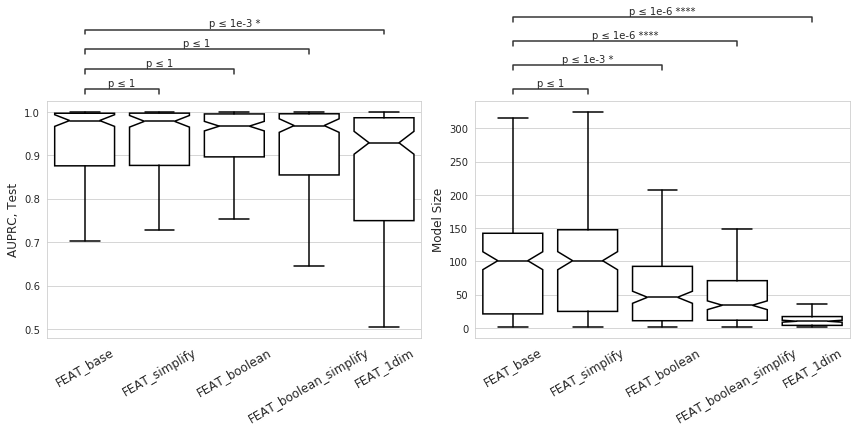

In [8]:
df_pmlb = df.loc[['Htn' not in d for d in df.dataset]]

chosen_aps = df_pmlb.loc[df_pmlb.clf_name == 'FEAT_boolean_simplify']['ave_precision_score_test'].median()
chosen_size = df_pmlb.loc[df_pmlb.clf_name == 'FEAT_boolean_simplify']['model_size'].median()
print(chosen_aps)
print(chosen_size)
for method, dfg in df_pmlb.groupby('clf_name'):
    print('Method:',method)
    aps = dfg['ave_precision_score_test'].median()
    size = dfg['model_size'].median()
    print('Median precision (improvement %):',
          '{:0.2f} ({:1.2f}%)'.format(aps, (aps-chosen_aps)/(chosen_aps)*100))
    print('Median size (improvement %):',
          ' {:0.2f} ({:1.2f}%)'.format(size, (chosen_size-size)/(chosen_size)*100))
print('pmlb datasets:',df_pmlb.dataset.unique())
box_comparison(df_pmlb, ['ave_precision_score_test','model_size'], 
               normalize=False,exclude=[], hue='clf_name',
              box_pairs = [
                          ('FEAT_base','FEAT_simplify'),
                           ('FEAT_base','FEAT_boolean'),
                           ('FEAT_base','FEAT_boolean_simplify'),
                           ('FEAT_base','FEAT_1dim'),
                          ],
               name = 'PMLB'
              )

## compare HTN datasets

htn datasets: ['HtnHypoKdxDTrain.csv' 'HtndxATrain.csv' 'HtndxBTrain.csv'
 'HtndxCTrain.csv' 'HtndxDTrain.csv' 'HtndxETrain.csv'
 'HtnHeuriATrain.csv' 'HtnHeuriBTrain.csv' 'HtnHeuriCTrain.csv'
 'HtnHeuriDTrain.csv' 'HtnHeuriETrain.csv' 'HtnHypoKdxATrain.csv'
 'HtnHypoKdxBTrain.csv' 'HtnHypoKdxCTrain.csv' 'HtnHypoKdxETrain.csv'
 'HtnHypoKHeuriATrain.csv' 'HtnHypoKHeuriBTrain.csv'
 'HtnHypoKHeuriCTrain.csv' 'HtnHypoKHeuriDTrain.csv'
 'HtnHypoKHeuriETrain.csv' 'ResHtndxATrain.csv' 'ResHtndxBTrain.csv'
 'ResHtndxCTrain.csv' 'ResHtndxDTrain.csv' 'ResHtndxETrain.csv'
 'ResHtnHeuriATrain.csv' 'ResHtnHeuriBTrain.csv' 'ResHtnHeuriCTrain.csv'
 'ResHtnHeuriDTrain.csv' 'ResHtnHeuriETrain.csv']
len(ax.lines): 25
len(ax.lines): 25
len(ax.lines): 25
len(ax.lines): 25
len(ax.lines): 25
FEAT_base v.s. FEAT_simplify: Mann-Whitney-Wilcoxon test two-sided P_val=9.339e-01 U_stat=4.518e+04
FEAT_base v.s. FEAT_boolean: Mann-Whitney-Wilcoxon test two-sided P_val=3.060e-01 U_stat=4.717e+04
FEAT_base v.s. FEAT_

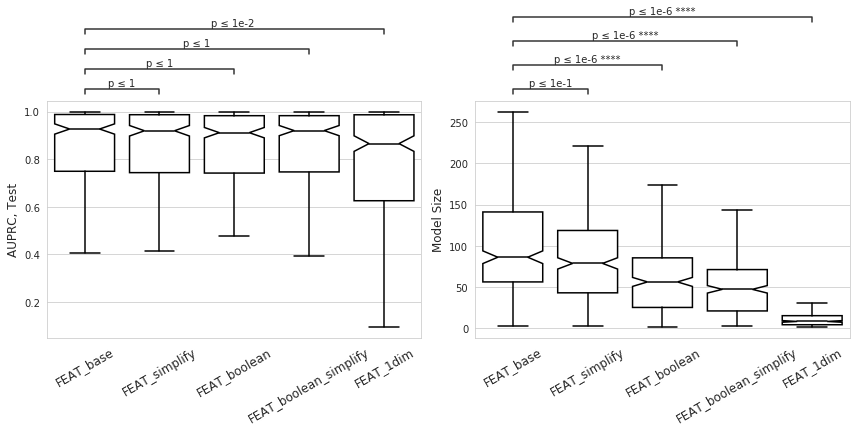

In [9]:
df_htn = df.loc[['Htn' in d for d in df.dataset]]
print('htn datasets:',df_htn.dataset.unique())
box_comparison(df_htn, ['ave_precision_score_test','model_size'], 
               normalize=False,exclude=[], hue='clf_name',
              box_pairs = [
                          ('FEAT_base','FEAT_simplify'),
                           ('FEAT_base','FEAT_boolean'),
                           ('FEAT_base','FEAT_boolean_simplify'),
#                            ('FEAT_boolean','FEAT_boolean_simplify'),
                           ('FEAT_base','FEAT_1dim'),
                          ],
              name = 'HTN')

## boxplots of individual metrics

roc_auc_score_test
len(ax.lines): 25
len(ax.lines): 25
len(ax.lines): 25
len(ax.lines): 25
len(ax.lines): 25
FEAT_base v.s. FEAT_simplify: Mann-Whitney-Wilcoxon test two-sided P_val=8.962e-01 U_stat=2.015e+04
FEAT_base v.s. FEAT_boolean: Mann-Whitney-Wilcoxon test two-sided P_val=5.107e-01 U_stat=2.076e+04
FEAT_base v.s. FEAT_boolean_simplify: Mann-Whitney-Wilcoxon test two-sided P_val=2.253e-01 U_stat=2.140e+04
FEAT_base v.s. FEAT_1dim: Mann-Whitney-Wilcoxon test two-sided P_val=3.858e-04 U_stat=2.409e+04


KeyError: 'roc_auc_score_test'

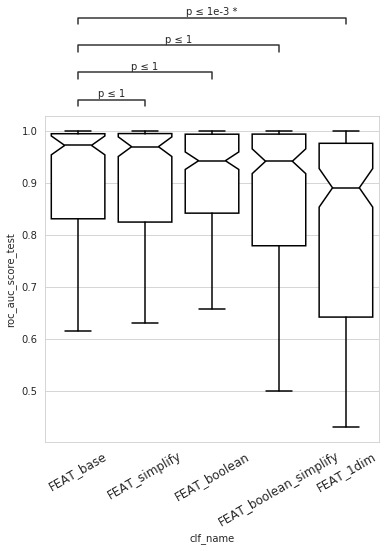

In [10]:
for comparison in ['roc_auc_score_test',
                   'ave_precision_score_test',
                   'model_complexity', 
                   'model_size',
                   'feature_space_correlation_test', 
                   'feature_space_correlation_train']:
    if 'feature' in comparison:
        exclude = ['FEAT_1dim']
    else:
        exclude = []
    print(comparison)
    box_comparison(df_pmlb, [comparison], normalize=False,exclude=exclude, hue='clf_name',
                  box_pairs = [
                              ('FEAT_base','FEAT_simplify'),
                               ('FEAT_base','FEAT_boolean'),
                               ('FEAT_base','FEAT_boolean_simplify'),
                               ('FEAT_base','FEAT_1dim'),
                              ], 
                  name = 'PMLB')
    box_comparison(df_htn, [comparison], normalize=False,exclude=exclude, hue='clf_name',
                  box_pairs = [
                              ('FEAT_base','FEAT_simplify'),
                               ('FEAT_base','FEAT_boolean'),
                               ('FEAT_base','FEAT_boolean_simplify'),
                               ('FEAT_base','FEAT_1dim'),
                              ], 
                  name = 'HTN')

In [ ]:
from statannot import add_stat_annotation
import itertools as it
sns.set_style('whitegrid')
def dataset_box_comparison(df, score, normalize=True, hue=None, exclude=[]):
    """Makes a boxplot comparison of 'score' over all (normalized) results""" 
    df_sum=pd.DataFrame()#columns=['dataset','clf_name','med_score'])
    df_sum['med_'+score] = df.groupby(['dataset','clf_name','version'])[score].median()
    if normalize:
        df['norm_'+score] = df.groupby('dataset')[score].transform(
            lambda x: (x - x.min()) / (x.max() - x.min()))
        df_sum['norm_'+score] = df.groupby(
            ['dataset','clf_name','version'])['norm_'+score].median().drop_duplicates()

#     comparison = 'norm_'+score if normalize else 'med_'+score
    comparison = 'norm_'+score if normalize else score
    
    plot_order = [o for o in Order if o not in exclude]
    df_sum=df_sum.reset_index(level=['dataset', 'clf_name','version'])
    sns.set_style('whitegrid')
    
    for dataset, dfg in df.groupby('dataset'):
        plt.figure(figsize=(6,6))
        ax = sns.boxplot(data=dfg,
                    y=comparison,
                    x='clf_name',
                    notch=False,
                    showfliers=False, 
                    order = plot_order,
                    dodge=False ,
#                     palette='colorblind',
                  )
#         sns.swarmplot(data=dfg,
#                       y=comparison,
#                       x='clf_name',
#                       order = plot_order,
#                       hue=hue,
#                       palette='Spectral',
#                       alpha=0.3
#                       )
#     test_results = add_stat_annotation(ax, data=df, 
#                                        x='clf_name', 
#                                        y=comparison, 
#                                        order=plot_order,
#                                        box_pairs = it.combinations(plot_order,2),
# #                                        box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
#                                        test='Mann-Whitney', 
# #                                        text_format='star',
#                                        loc='outside', 
#                                        verbose=2)
        plt.xticks(rotation=45,size=12)
        if normalize:
            plt.ylabel('Normalized '+score,size=12)
        else:
            plt.ylabel(score,size=12) 
        plt.legend(loc=[1.1,0.0])
        plt.title(dataset)
        plt.xlabel('')
        plt.tight_layout()
        if not os.path.exists('figs/'+rdir+'/'):
            os.mkdir('figs/'+rdir)
        for filetype in ['.png','.pdf']:
            plt.savefig('figs/'+rdir+'/'+dataset+'_'+score+filetype, dpi=400)

        plt.show()

In [ ]:
for comparison in ['roc_auc_score_test',
                   'model_complexity', 
                   'model_size',
                   'feature_space_correlation_test', 
                   'feature_space_correlation_train']:
    if 'feature' in comparison:
        exclude = ['FEAT_1dim']
    else:
        exclude = []
    print(comparison)
    dataset_box_comparison(df, comparison, normalize=False,exclude=exclude, hue='clf_name')


In [ ]:
# plot learning curves
for d in df_stats.dataset.unique():
    print(d)
    df_dataset = df_stats.loc[df_stats.dataset==d]
#     d_results = [x for x in stats_frames if x['dataset']==d]
    h = plt.figure(figsize=(8,4))
    ax = h.add_subplot(1,2,1)
    sns.lineplot(x="gens", y="min_losses",
                 hue="clf_name", 
#                  style="clf_name",
                 ax=ax,
                 data=df_dataset
                )
    plt.gca().legend_.remove()
    plt.title(d)
    ax = h.add_subplot(1,2,2)
    sns.lineplot(x="gens", y="min_losses_val",
                 hue="clf_name", 
#                  style="clf_name",
                 ax=ax,
                 data=df_dataset
                )
    plt.gca().legend(loc=[1.1,0.5])
    plt.title(d)
    if not os.path.exists('figs/'+rdir+'/learning_curves/'):
        os.mkdir('figs/'+rdir+'/learning_curves/')
                          
    plt.savefig('figs/'+rdir+'/learning_curves/'+d+'_learning_curve.png', dpi=400)
    plt.savefig('figs/'+rdir+'/learning_curves/'+d+'_learning_curve.svg', dpi=400)

